# Import Necessary Packages

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Generate the Time-series Sequence of the CSI Dataset

In [ ]:
fc=2*10e9 #carrier frequency
c=3*10e8 
v=15 # user velocity
fd=fc*v/c #doppler frequency
Ts=0.001 #sampling time 
a=0
b=2*np.pi
M=124
alpha=a+(b-a)*np.random.uniform(0,1,M) #uniformly distributed from 0 to 2 pi
beta=a+(b-a)*np.random.uniform(0,1,M) #uniformly distributed from 0 to 2 pi
theta=a+(b-a)*np.random.uniform(0,1,M) #uniformly distributed from 0 to 2 pi
m=np.arange(M)+1;
x=np.cos(((2*m-1)*np.pi+theta)/(4*M))

In [ ]:
N=100000 #Number of data samples
h_re=np.zeros(N)
h_im=np.zeros(N)
for n in range(N):

  h_re[n]=1/np.sqrt(M)*np.sum(np.cos(2*np.pi*fd*x*n*Ts+alpha))
  h_im[n]=1/np.sqrt(M)*np.sum(np.sin(2*np.pi*fd*x*n*Ts+beta))


# Create Feature and Target Variables

In [ ]:
#Feature
X=np.vstack((h_re, h_im))
X=np.transpose(X)
#Target
y=X
for i in range(len(X)):
 X[i]=X[i]+np.random.normal(0, 10e-6,2)
l=len(y)
y=y[0:l-100]

# Generate the Inference Error Function

In [ ]:
u=10 #size of the feature
print('size of the feature', u)
Xt=X[0:l-100,:]
a=np.zeros(u)
for j in range(u):
    Xt=np.hstack((Xt,X[j+1:l-99+j,:]))
X=Xt

i=20 #number of Age values in the simulation
l=len(y)
age=np.zeros(i) 
score1=np.zeros(i)
score2=np.zeros(i)

for n in range(i):
  print("AoI", n)
  age[n]=n
  y_t=y[0:l-n]
  X_t=X[n:l, :]
  
  #Because we model the random process h(t)=h_re(t)+ j h_im(t) as complex guassian, the linear predictor is an optimal choice. Hence, we have used linear regression.
  
  from sklearn.model_selection import train_test_split
  X_train, X_test, y_train, y_test = train_test_split(X_t, y_t, test_size=0.20)
  from sklearn.linear_model import LinearRegression
  regressor = LinearRegression()
  regressor.fit(X_train, y_train)
    
  y_pred = regressor.predict(X_train)
  y_val =  regressor.predict(X_test)
  from sklearn.metrics import mean_squared_error
  score1[n]=mean_squared_error(y_train, y_pred)
  score2[n]=mean_squared_error(y_test, y_val)

print('InferenceError=', score1)


size of the feature 10
AoI 0
AoI 1
AoI 2
AoI 3
AoI 4
AoI 5
AoI 6
AoI 7
AoI 8
AoI 9
AoI 10
AoI 11
AoI 12
AoI 13
AoI 14
AoI 15
AoI 16
AoI 17
AoI 18
AoI 19
InferenceError= [1.55197331e-29 1.11857600e-07 3.76739429e-06 4.59587628e-05
 3.19796110e-04 1.53229148e-03 5.47365033e-03 1.55524606e-02
 3.64010604e-02 7.16780243e-02 1.20317659e-01 1.75803665e-01
 2.25040001e-01 2.57383991e-01 2.70782207e-01 2.72771721e-01
 2.73960281e-01 2.85249863e-01 3.02508393e-01 3.19080979e-01]


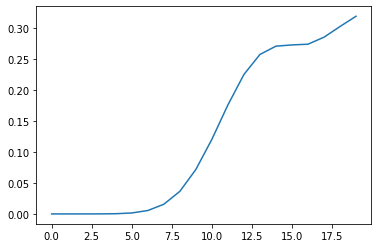

In [ ]:
plt.plot(score1)